In [1]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# load train and test dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

170508288/170498071 [==============================] - 6s 0us/step


In [2]:
# define cnn model
def Net_A():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def Net_B():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def Net_C():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()



In [3]:
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy  = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    pyplot.figure(figsize=(15,10))

    pyplot.subplot(2, 2, 1)
    pyplot.plot(accuracy, label = "Training accuracy")
    pyplot.plot(val_accuracy, label="Validation accuracy")
    pyplot.legend()
    pyplot.title("Training vs validation accuracy")


    pyplot.subplot(2,2,2)
    pyplot.plot(loss, label = "Training loss")
    pyplot.plot(val_loss, label="Validation loss")
    pyplot.legend()
    pyplot.title("Training vs validation loss")

    pyplot.show()
    
def score(model,test):
    model.fit(trainX,trainY)
    ypred=model.predict(test)
    score = model.evaluate(testX, testY, verbose=0)
    print("Accuracy on test set: ",score[1])


In [4]:
model1 = Net_A()
history1 = model1.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
summarize_diagnostics(history1)

2021-11-20 16:14:12.778596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 16:14:12.924733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 16:14:12.925892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 16:14:12.927736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50
782/782 [==============================] - 5s 4ms/step - loss: 1.9328 - accuracy: 0.3186 - val_loss: 1.9208 - val_accuracy: 0.3245
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8401 - accuracy: 0.3591 - val_loss: 1.8636 - val_accuracy: 0.3392
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8216 - accuracy: 0.3673 - val_loss: 1.8550 - val_accuracy: 0.3450
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8004 - accuracy: 0.3738 - val_loss: 1.8470 - val_accuracy: 0.3660
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7923 - accuracy: 0.3817 - val_loss: 1.7957 - val_accuracy: 0.3714
Epoch 6/50
782/782 [==============================] - 3s 3ms/step - loss: 1.7723 - accuracy: 0.3901 - val_loss: 1.8164 - val_accuracy: 0.3630
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7788 - accuracy: 0.3864 - val_loss: 1.7888 - val_accuracy: 0.3834
Epoch 

In [5]:
model2 = Net_B()
history2 = model2.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
summarize_diagnostics(history2)

Epoch 1/50
782/782 [==============================] - 4s 4ms/step - loss: 1.9050 - accuracy: 0.3230 - val_loss: 1.7692 - val_accuracy: 0.3689
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7181 - accuracy: 0.3867 - val_loss: 1.6927 - val_accuracy: 0.3962
Epoch 3/50
782/782 [==============================] - 3s 3ms/step - loss: 1.6514 - accuracy: 0.4138 - val_loss: 1.6477 - val_accuracy: 0.4106
Epoch 4/50
782/782 [==============================] - 3s 3ms/step - loss: 1.6032 - accuracy: 0.4315 - val_loss: 1.6127 - val_accuracy: 0.4250
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5683 - accuracy: 0.4445 - val_loss: 1.5795 - val_accuracy: 0.4319
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5489 - accuracy: 0.4518 - val_loss: 1.6124 - val_accuracy: 0.4259
Epoch 7/50
782/782 [==============================] - 3s 3ms/step - loss: 1.5309 - accuracy: 0.4583 - val_loss: 1.5363 - val_accuracy: 0.4575
Epoch 

In [6]:
model3 = Net_C()
history3 = model3.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
summarize_diagnostics(history3)

Epoch 1/50


2021-11-20 16:21:12.505625: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


782/782 [==============================] - 10s 5ms/step - loss: 1.4699 - accuracy: 0.4840 - val_loss: 1.2450 - val_accuracy: 0.5646
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.1801 - accuracy: 0.5916 - val_loss: 1.1907 - val_accuracy: 0.5735
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.0764 - accuracy: 0.6274 - val_loss: 1.1768 - val_accuracy: 0.5850
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0116 - accuracy: 0.6514 - val_loss: 1.0768 - val_accuracy: 0.6292
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9631 - accuracy: 0.6694 - val_loss: 1.0859 - val_accuracy: 0.6205
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9224 - accuracy: 0.6819 - val_loss: 1.0688 - val_accuracy: 0.6384
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8864 - accuracy: 0.6948 - val_loss: 1.0809 - val_accuracy: 0.6326
Epoch 8/50
782/7

<function Net_A at 0x7fc25b9233b0>
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7851 - accuracy: 0.3962
Accuracy on test set:  0.3596000075340271


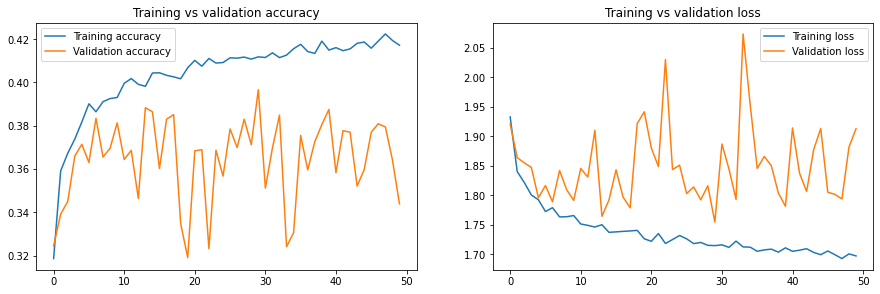

<function Net_B at 0x7fc25b923560>
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3452 - accuracy: 0.5194
Accuracy on test set:  0.4749000072479248


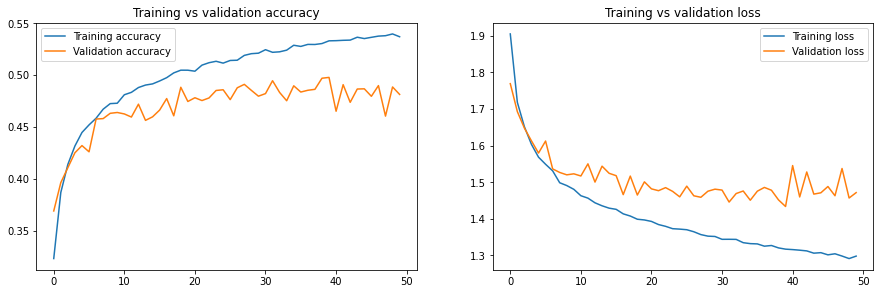

<function Net_C at 0x7fc25b923710>
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4515 - accuracy: 0.8381
Accuracy on test set:  0.623199999332428


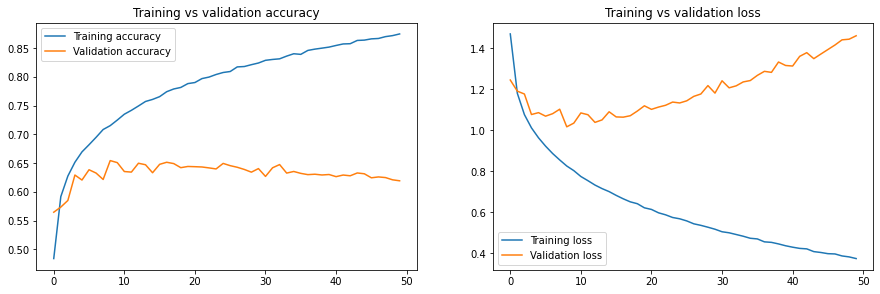

In [7]:
net = [Net_A, Net_B, Net_C]
models = [model1,model2,model3]
histories = [history1, history2, history3]

for i in range(3):
    cash = net[i]
    print(cash)
    score(models[i],testX)
    plot_history(histories[i])